# Linear Regression & Home Price Analysis

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#from sklearn.metrics import make_squared_error #(?)


import matplotlib.pyplot as plt
import seaborn as sns



np.random.seed(1)
bias = 20*np.random.randn()


X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

MSE: 1131.99
R²: 0.95
[44.166675   80.03255319 90.51428891 86.13498446 67.48800688]
32.68084820747811


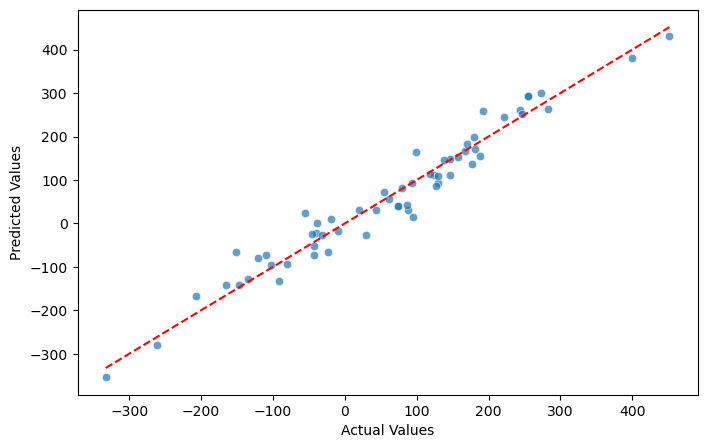

In [ ]:
# Define Custom R² and MSE Calculations
calc_R2 = lambda y, y_hat: 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
calc_MSE = lambda y, y_hat: np.mean((y - y_hat)**2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R²
MSE = calc_MSE(y_test, y_pred)
R2 = calc_R2(y_test, y_pred)
print(f"MSE: {MSE:.2f}")
print(f"R²: {R2:.2f}")
print(model.coef_)
print(model.intercept_)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [ ]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y



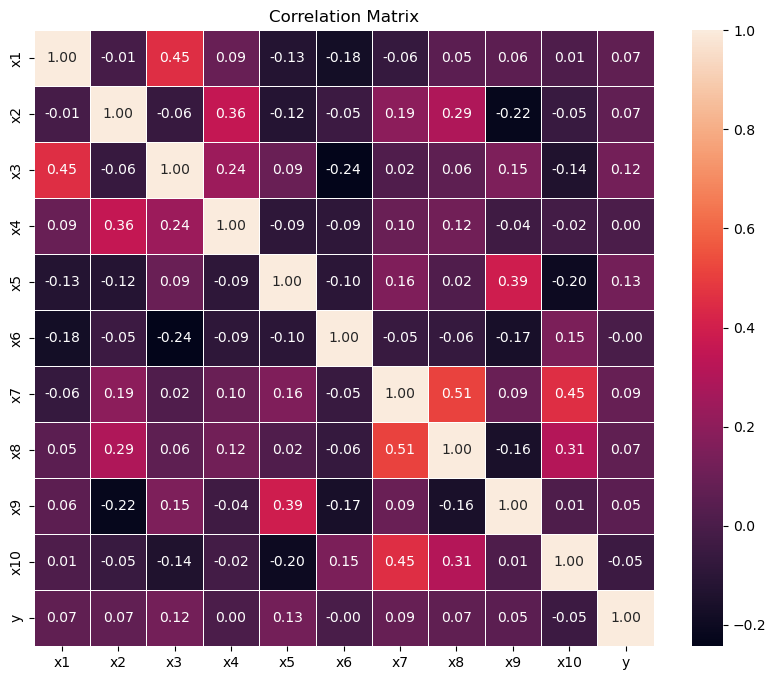

MSE: 1006.93
R²: -0.04
[100.54351296  68.09467682  39.08138322 -53.14977214  76.59451309
  62.1462408  111.41635577   2.41736139   0.64834276 -74.00176706]
32.67545906701269


In [ ]:
# Show Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reg2_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Define R² and MSE
calc_R2 = lambda y, y_hat: 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
calc_MSE = lambda y, y_hat: np.mean((y - y_hat)**2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R²
MSE = calc_MSE(y_test, y_pred)
R2 = calc_R2(y_test, y_pred)

# Print Model Performance
print(f"MSE: {MSE:.2f}")
print(f"R²: {R2:.2f}")
print(model.coef_)
print(model.intercept_)

## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [ ]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()
#choose the feature with high correlation - price 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


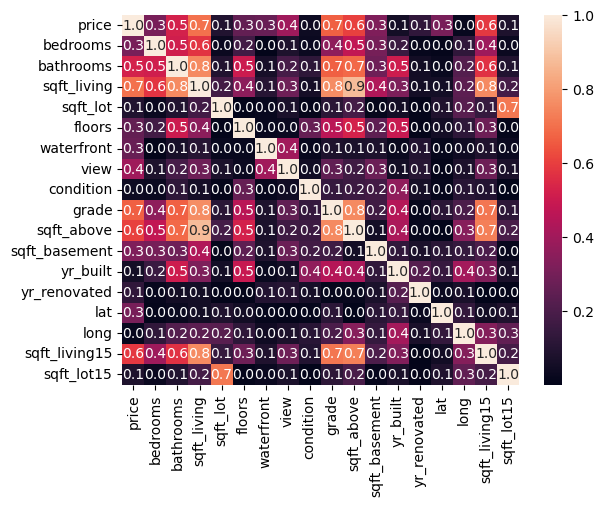

In [ ]:

housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)
corr = housing_df.corr()
sns.heatmap(np.abs(corr), annot = True, fmt = '.1f')
plt.show()

In [ ]:
correlations = housing_df.corr()['price'].abs().sort_values(ascending=False)
print(correlations.head(10))  # Top 10 features most correlated with price


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sqft_living', 'grade', 'sqft_above']
X = housing_df[features]
y = housing_df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate R²
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

# Print results
print(f"R² Score: {r2:.4f}")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



R² Score: 0.5416
Model Coefficients: [205950.07721669 129327.18113011 -62220.32301854]
Model Intercept: 538744.9273162483


/var/folders/v5/4gbknswj0s54p5w79qx4x7yr0000gn/T/ipykernel_59771/3692849345.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


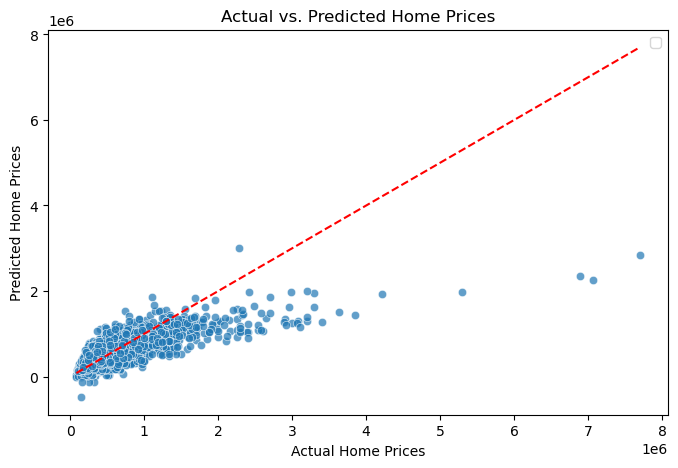

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs. Predicted Home Prices")
plt.legend()
plt.show()

R² Score (Manual Calculation): 0.6737
Top 3 Most Important Features: ['lat', 'grade', 'sqft_living']


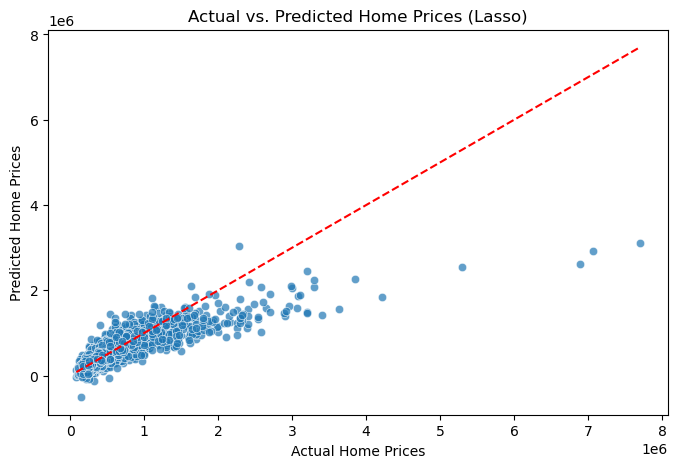

In [ ]:
from sklearn.linear_model import Lasso
X = housing_df.drop(columns=['price'])  
y = housing_df['price']  

feature_names = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

alpha_value = 5000  
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train, y_train)

# Make Predictions
y_pred = lasso_model.predict(X_test)

# Calculate R²
ss_total = np.sum((y_test - np.mean(y_test))**2)  
ss_residual = np.sum((y_test - y_pred)**2)  # Residual Sum of Squares
r2_manual = 1 - (ss_residual / ss_total)

print(f"R² Score (Manual Calculation): {r2_manual:.4f}")
lasso_coefficients = np.abs(lasso_model.coef_)  
top_features_idx = np.argsort(lasso_coefficients)[-3:] 
top_features = feature_names[top_features_idx]

print("Top 3 Most Important Features:", top_features.tolist())

# Plot actual vs predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs. Predicted Home Prices (Lasso)")
plt.show()


### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

Model for Homes Below $1M:
R² Score: 0.6875
Top 3 Most Important Features: ['sqft_living', 'grade', 'lat']


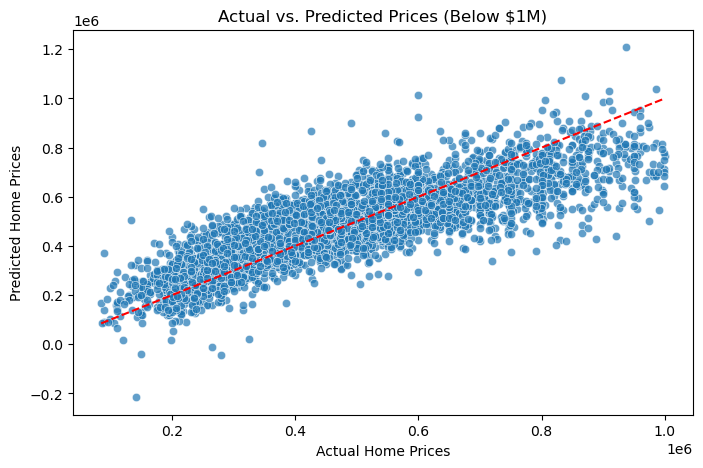


Model for Homes Above $1M:
R² Score: 0.5543
Top 3 Most Important Features: ['waterfront', 'long', 'sqft_living']


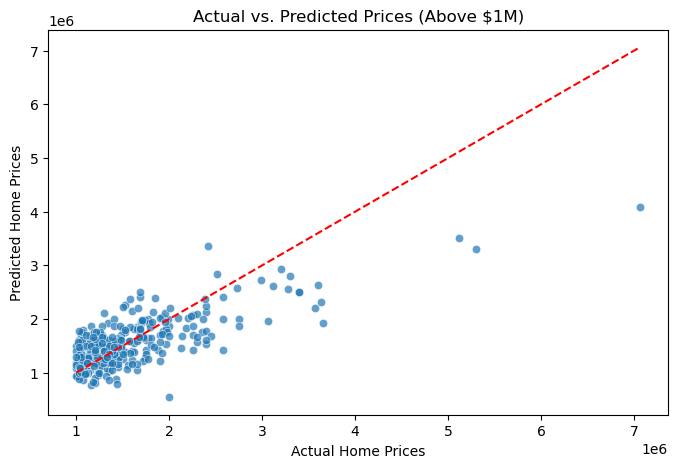

In [ ]:
low_price_df = housing_df[housing_df['price'] < 1_000_000]
high_price_df = housing_df[housing_df['price'] >= 1_000_000]

# Train and evaluate a Lasso model
def train_lasso(df, alpha=500):
    X = df.drop(columns=['price'])  
    y = df['price'] 
    feature_names = X.columns  
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
    
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # calculate R²
    ss_total = np.sum((y_test - np.mean(y_test))**2)
    ss_residual = np.sum((y_test - y_pred)**2)
    r2_manual = 1 - (ss_residual / ss_total)
    
    lasso_coefficients = np.abs(model.coef_)
    top_features_idx = np.argsort(lasso_coefficients)[-3:]
    top_features = feature_names[top_features_idx]
    
    print(f"R² Score: {r2_manual:.4f}")
    print("Top 3 Most Important Features:", top_features.tolist())
    
    # Plot predicted vs actual prices
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Actual Home Prices")
    plt.ylabel("Predicted Home Prices")
    plt.title(f"Actual vs. Predicted Prices ({'Below $1M' if df is low_price_df else 'Above $1M'})")
    plt.show()

print("Model for Homes Below $1M:")
train_lasso(low_price_df, alpha=500)

print("\nModel for Homes Above $1M:")
train_lasso(high_price_df, alpha=5000)  
